## Key Driver Analysis 

#### Business Question :- <b> Factors effecting over all experince of airport traveller  


##### Data Source :-  Results from Austin-Bergstrom International Airport's customer surveys. Surveys are tallied and reported quarterly to help ABIA improve general customer satisfaction as well as to target specific areas for improvement.

##### Sample Size: ~3,500 respondents collected quarterly from Q1-2015 to Q4-2017

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('airport-quarterly-passenger-survey-1.csv')

In [9]:
df 

,Quarter,Date recorded,Departure time,Ground transportation to/from airport,Parking facilities,Parking facilities (value for money),Availability of baggage carts,Efficiency of check-in staff,Check-in wait time,Courtesy of of check-in staff,...,Business/executive lounges,Availability of washrooms,Cleanliness of washrooms,Comfort of waiting/gate areas,Cleanliness of airport terminal,Ambience of airport,Arrivals passport and visa inspection,Speed of baggage delivery,Customs inspection,Overall satisfaction
0,3Q16,09/04/2016,11:45,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,4.0,0.0,4.0,5.0,4.0,4.0,0.0,0.0,0.0
1,2Q16,05/01/2016,16:45,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0
2,2Q16,04/07/2016,11:10,4.0,4.0,4.0,5.0,5.0,5.0,5.0,...,0.0,5.0,5.0,5.0,5.0,5.0,NaN,0.0,5.0,0.0
3,3Q16,09/02/2016,17:16,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0
4,3Q16,08/04/2016,7:49,5.0,0.0,0.0,0.0,4.0,4.0,4.0,...,2.0,4.0,4.0,2.0,5.0,4.0,4.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,2Q17,04/09/2017,11:30 AM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,5.0
3497,2Q17,04/10/2017,10:35 AM,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,4.0,4.0,4.0,5.0,4.0,0.0,0.0,0.0,4.0
3498,2Q17,05/11/2017,1:42 PM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,4.0
3499,2Q17,06/03/2017,5:05 PM,5.0,0.0,0.0,0.0,5.0,4.0,5.0,...,0.0,5.0,5.0,4.0,4.0,4.0,0.0,4.0,0.0,4.0


In [4]:
from relativeImp import relativeImp

In [11]:
df = df.drop(columns=['Quarter', 'Date recorded', 'Departure time'])

In [12]:
df.eq(0)

,Ground transportation to/from airport,Parking facilities,Parking facilities (value for money),Availability of baggage carts,Efficiency of check-in staff,Check-in wait time,Courtesy of of check-in staff,Wait time at passport inspection,Courtesy of inspection staff,Courtesy of security staff,...,Business/executive lounges,Availability of washrooms,Cleanliness of washrooms,Comfort of waiting/gate areas,Cleanliness of airport terminal,Ambience of airport,Arrivals passport and visa inspection,Speed of baggage delivery,Customs inspection,Overall satisfaction
0,True,True,True,True,False,True,True,False,False,False,...,True,False,True,False,False,False,False,True,True,True
1,True,True,True,True,False,True,True,False,False,False,...,True,True,True,False,False,False,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,True
3,True,True,True,True,False,True,True,False,False,False,...,True,False,False,False,False,False,False,True,True,True
4,False,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,True,True,True,True,True,True,True,False,False,False,...,True,True,True,True,False,False,True,True,True,False
3497,True,True,True,True,True,False,True,False,False,False,...,True,False,False,False,False,False,True,True,True,False
3498,True,True,True,True,True,True,True,False,False,False,...,True,False,False,False,False,False,True,True,True,False
3499,False,True,True,True,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,True,False


##### Q1 :- Which factord effect traveller experience process in terms of speedy process

In [16]:
# Scales are normally 1-5. Hypothesis is that a 0 means the a respondent saw the question, but didn't answer or ansered NA
# Changing all 0 to NaN
df[df.eq(0)] = np.nan

# Drop missing values dependent variables
df = df.dropna(subset=['Overall satisfaction'])

df.head(5)

,Ground transportation to/from airport,Parking facilities,Parking facilities (value for money),Availability of baggage carts,Efficiency of check-in staff,Check-in wait time,Courtesy of of check-in staff,Wait time at passport inspection,Courtesy of inspection staff,Courtesy of security staff,...,Business/executive lounges,Availability of washrooms,Cleanliness of washrooms,Comfort of waiting/gate areas,Cleanliness of airport terminal,Ambience of airport,Arrivals passport and visa inspection,Speed of baggage delivery,Customs inspection,Overall satisfaction
151,NaN,2.0,1.0,NaN,NaN,NaN,NaN,5.0,5.0,1.0,...,NaN,5.0,5.0,4.0,5.0,5.0,5.0,5.0,NaN,5.0
155,4.0,NaN,NaN,NaN,3.0,4.0,4.0,3.0,4.0,4.0,...,NaN,3.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0
351,5.0,NaN,NaN,NaN,4.0,4.0,4.0,3.0,4.0,5.0,...,NaN,4.0,5.0,5.0,4.0,5.0,5.0,4.0,NaN,3.0
373,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
646,5.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,4.0,3.0,5.0,5.0,4.0,4.0,2.0,3.0


In [17]:
yName =  'Overall satisfaction'

# Independent Variables (all related to speed)
xNames = ['Check-in wait time',
          'Wait time at passport inspection',
          'Wait time of security inspection',
          'Speed of baggage delivery',
          'Efficiency of check-in staff']

results = relativeImp(df, outcomeName = yName, driverNames = xNames)
results

,driver,rawRelaImpt,normRelaImpt
0,Check-in wait time,0.047324,13.920997
1,Wait time at passport inspection,0.077577,22.820215
2,Wait time of security inspection,0.072228,21.246809
3,Speed of baggage delivery,0.085748,25.223919
4,Efficiency of check-in staff,0.057070,16.788061


In [18]:
sum(results.rawRelaImpt) # R-squared

# What is a good R-squared?
# <.3 is not good
# .3 - .4 is normal
# .4 - .5 is great
# .5 - .6 is exceptional
# >.6 is dangerously high, possibly overfitting

0.3399464695905098

In [19]:
sum(results.normRelaImpt) # It is the percentage of variance each predictor explains.

# The Feature Importance sums to 100%.

100.00000000000003

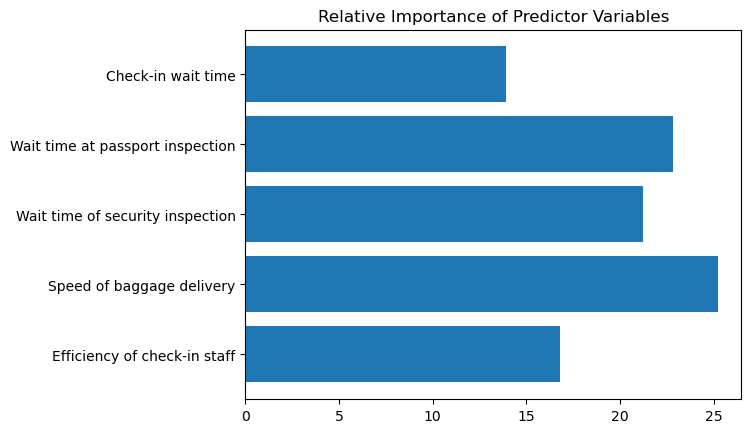

In [21]:
# Plot the relative Importance
fig, ax = plt.subplots()

ax.barh(results.driver, results.normRelaImpt)
ax.invert_yaxis() 
ax.set_title('Relative Importance of Predictor Variables')

plt.show()

<b>Common Pitfalls</b>
<br>* Including too many variables
<br>* Sometimes Shapley coefficents (not included in this python package) can sum to a value higher than is possible on the dependent variable. In other words, if you move all the predictor variables to 5, then the dependent variable moves to 6. In market research, this really isn't a problem, because companies will never be able to get to perfect 5's.
<br>* The scales of the predictor variables may be different, or may be a binary. Shapely uses "standardized" coefficients versus "unstandardized". Make sure you know what you are working with when making explanations.
<br>* NaNs are common in some aspects of market research. So be sure you know how you are handling them.

##### Q2 Choosing all the variables are related to the the atomosphere of the airport.

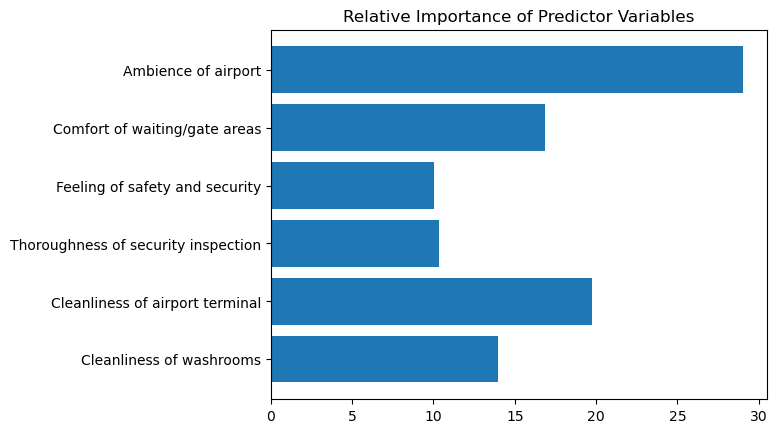

In [23]:
# Dependent variable
yName =  'Overall satisfaction'

# Independent Variables Atomosphere
xNames = [    'Ambience of airport',
    'Comfort of waiting/gate areas',
    'Feeling of safety and security',
    'Thoroughness of security inspection',
    'Cleanliness of airport terminal',
    'Cleanliness of washrooms']

results = relativeImp(df, outcomeName = yName, driverNames = xNames)

# Plot the relative Importance
fig, ax = plt.subplots()

ax.barh(results.driver, results.normRelaImpt)
ax.invert_yaxis() 
ax.set_title('Relative Importance of Predictor Variables')

plt.show()

In [25]:
results

,driver,rawRelaImpt,normRelaImpt
0,Ambience of airport,0.174685,29.042911
1,Comfort of waiting/gate areas,0.101416,16.861263
2,Feeling of safety and security,0.060430,10.047111
3,Thoroughness of security inspection,0.062185,10.338761
4,Cleanliness of airport terminal,0.118778,19.747896
5,Cleanliness of washrooms,0.083978,13.962058


<b>Questions and Answers</b>
<br>Question: What happens when you add more predictor variables?

<br>Answer: The model permuations increase and it can take forever. Try running relativeImp with all 33 predictor variables. What happens?

<br>Question: Are there alternatives to Shapley?

<br>Answer: Yes! A method called Relative Weights Analysis (RWA) produces the same Relative Importance scores as Shapley, but it is way faster for large models. These are psuedo-Relative Importance scores and the math is not as intuitive, but if the end is the same, does the means matter?

<br>Question: What else can Shapley be used for?

<br>Answer: Lots of use cases. Determining the importance of your features in a model (should you remove a predictor variable). Explaining models to non-technical audiences. Attribution modeling.

<br>Question: Can Shapley be used on models other than Linear Regression?

<br>Answer: Yes! It's excellent for explaining "black box" models.